In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def hilbert_matrix_construct(size):
    matrix = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            matrix[i, j] = 1 / (i + j + 1)
    return matrix

In [5]:
print(hilbert_matrix_construct(3))

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [49]:
def hilbert_matrix_construct_2(size):
    vector = np.array(np.arange(1, size + 1, 1))[np.newaxis]
    return 1 / (vector.T + vector - 1) #используется транслирование

In [50]:
print(hilbert_matrix_construct_2(3))


[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]


In [55]:
matSizes = np.arange(3,13)
print(matSizes)
euclid = np.zeros((len(matSizes),2))
print(euclid)
cond = np.zeros((len(matSizes),2))
for i, j in enumerate(matSizes):
    matrix = hilbert_matrix_construct_2(j)
    matrix_inv = np.linalg.inv(matrix)
    mul_matrix = matrix @ matrix_inv
    euclid_dist = mul_matrix - np.eye(j)
    euclid[i, 0] = np.sqrt(np.sum(euclid_dist **2))
    cond[i, 0] = np.linalg.cond(matrix)

    matrix_random = np.random.randn(j, j)
    matrix_random_inv  = np.linalg.inv(matrix_random)
    mul_matrix_random = matrix_random @ matrix_random_inv
    euclid_dist = mul_matrix_random - np.eye(j)
    euclid[i,1] = np.sqrt(np.sum(euclid_dist **2))
    cond[i,1] = np.linalg.cond(matrix_random)


[ 3  4  5  6  7  8  9 10 11 12]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Text(0.5, 1.0, 'Matrix condition number')

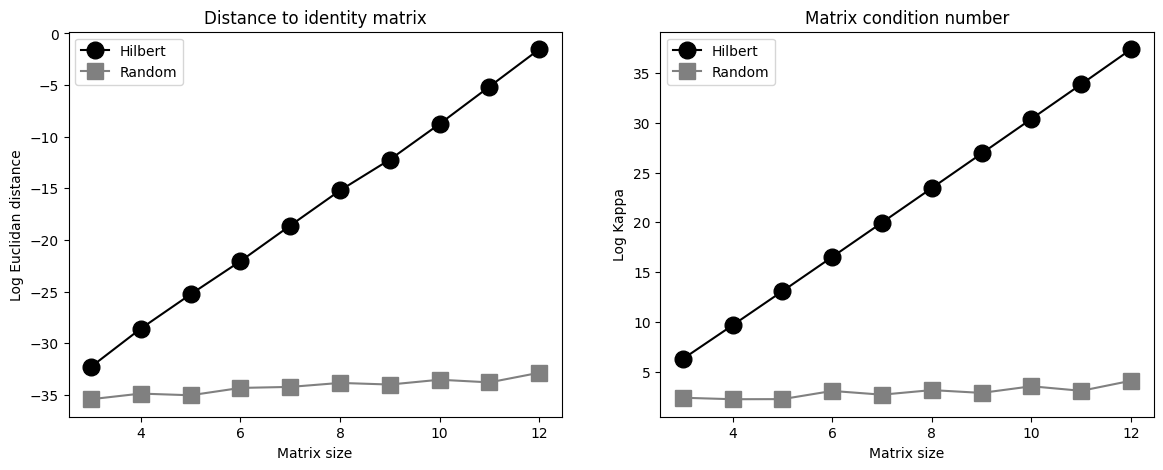

In [56]:
fig,axs = plt.subplots(1,2,figsize=(14,5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes,np.log(euclid),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')

## plot the condition numbers
h = axs[1].plot(matSizes,np.log(cond),'s-',markersize=12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')